In [362]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [363]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [364]:
df.shape

(5000, 16)

In [405]:
df = pd.read_csv("/content/drive/MyDrive/mydataset/youtube.csv")

df.head(2)

,Channel Name,Youtuber Name,Total Videos,Best Video,Avg Video Length (min),Total Subscribers,Members Count,AI Generated Content (%),Neural Interface Compatible,Metaverse Integration Level,Quantum Computing Topics,Holographic Content Rating,Engagement Score,Content Value Index
0,Smith-Ross Labs,Eric Patel,68,VR Challenge: Review 2023,24.8,8264152,303319,9,True,Full,5,3D,130655.44,6.2
1,Sandoval PLC Hub,Cynthia Harrington,128,Nanotech Simulation: Analysis 2024,22.9,8768222,384629,62,False,NaN,4,3D,138624.73,21.4


In [366]:
df.drop(['Youtuber Name', 'Channel Name', 'Best Video'], axis='columns', inplace=True)
df.head()

,Total Videos,Avg Video Length (min),Total Subscribers,Members Count,AI Generated Content (%),Neural Interface Compatible,Metaverse Integration Level,Quantum Computing Topics,Holographic Content Rating,Engagement Score,Content Value Index
0,68,24.8,8264152,303319,9,True,Full,5,3D,130655.44,6.2
1,128,22.9,8768222,384629,62,False,NaN,4,3D,138624.73,21.4
2,282,24.0,6163386,361743,31,True,Advanced,6,1D,97442.53,13.5
3,302,24.6,4712268,58483,5,False,NaN,15,1D,74500.50,12.0
4,129,24.6,9592017,333873,63,True,NaN,12,3D,151648.85,27.3


<Axes: >

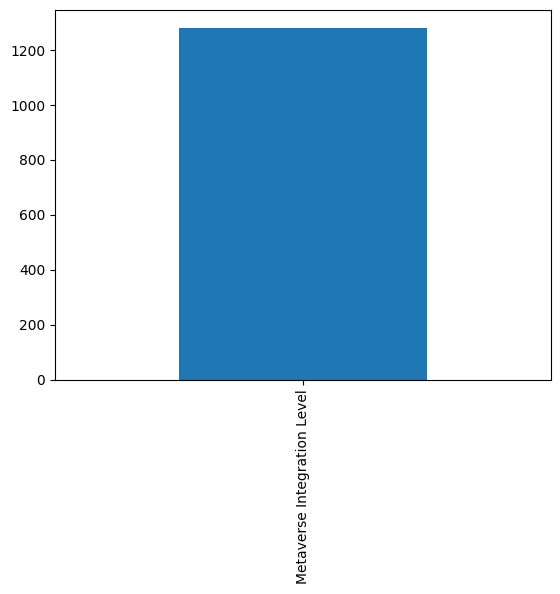

In [411]:
missing = df.isnull().sum()

missing = missing[missing > 0]

missing.sort_values(inplace=True)

missing.plot.bar()

In [368]:
df.duplicated().sum()

0

In [369]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [370]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes == "object":
      print(f"{column} : {df[column].unique()}")

In [371]:
print_unique_col_values(df)

Metaverse Integration Level : ['Full' nan 'Advanced' 'Basic']
Holographic Content Rating : ['3D' '1D' '2D' '4D']


In [372]:
df['Metaverse Integration Level'].value_counts(dropna=False)

,count
Metaverse Integration Level,
NaN,1282
Full,1248
Basic,1236
Advanced,1234


In [373]:
def encode_dataframe(df):
    df = df.copy()


    binary_cols = [col for col in df.columns
    if df[col].nunique() == 2 and df[col].dtype in ['object', 'bool']]
    le = LabelEncoder()
    for col in binary_cols:
        df[col] = le.fit_transform(df[col])

    multi_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 2]

    df = pd.get_dummies(df, columns=multi_cols)

    df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

    return df



In [375]:
df = encode_dataframe(df)

In [379]:
cols_to_scale = ['Total Videos','Avg Video Length (min)','Total Subscribers','Members Count','AI Generated Content (%)','Quantum Computing Topics','Engagement Score','Content Value Index',]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [380]:
df.head()

,Total Videos,Avg Video Length (min),Total Subscribers,Members Count,AI Generated Content (%),Neural Interface Compatible,Quantum Computing Topics,Engagement Score,Content Value Index,Metaverse Integration Level_Advanced,Metaverse Integration Level_Basic,Metaverse Integration Level_Full,Holographic Content Rating_1D,Holographic Content Rating_2D,Holographic Content Rating_3D,Holographic Content Rating_4D
0,0.040000,0.581633,0.826387,0.606536,0.09,1,0.25,0.826387,0.140909,0,0,1,0,0,1,0
1,0.173333,0.387755,0.876803,0.769206,0.62,0,0.20,0.876803,0.486364,0,0,0,0,0,1,0
2,0.515556,0.500000,0.616273,0.723420,0.31,1,0.30,0.616273,0.306818,1,0,0,1,0,0,0
3,0.560000,0.561224,0.471135,0.116715,0.05,0,0.75,0.471135,0.272727,0,0,0,1,0,0,0
4,0.175556,0.561224,0.959197,0.667663,0.63,1,0.60,0.959197,0.620455,0,0,0,0,0,1,0


In [381]:
df.dtypes

,0
Total Videos,float64
Avg Video Length (min),float64
Total Subscribers,float64
Members Count,float64
AI Generated Content (%),float64
Neural Interface Compatible,int64
Quantum Computing Topics,float64
Engagement Score,float64
Content Value Index,float64
Metaverse Integration Level_Advanced,int64


In [382]:
X = df.drop('Engagement Score', axis=1)
y = df['Engagement Score']

In [384]:
X = df.drop('Engagement Score', axis=1)
y = df['Engagement Score']
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [391]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

model = keras.Sequential([
    Dense(64, input_shape=(x_train.shape[1],), activation="relu"),
    Dropout(0.5),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(16, activation="relu"),
    Dropout(0.2),
    Dense(1)
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

In [392]:
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='mse',
              metrics=["mse"])



history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2137 - mse: 0.2137 - val_loss: 0.1184 - val_mse: 0.1184
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1119 - mse: 0.1119 - val_loss: 0.0864 - val_mse: 0.0864
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0938 - mse: 0.0938 - val_loss: 0.0704 - val_mse: 0.0704
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0795 - mse: 0.0795 - val_loss: 0.0528 - val_mse: 0.0528
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0662 - mse: 0.0662 - val_loss: 0.0428 - val_mse: 0.0428
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0357 - val_mse: 0.0357
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0538 - mse: 0.0538 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

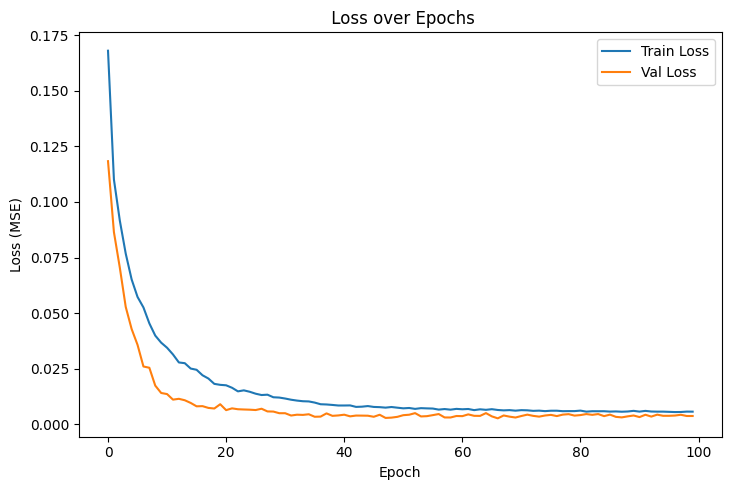

In [400]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(' Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.tight_layout()
plt.show()


In [395]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, model.predict(x_test))
print("MAE:", mae)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAE: 0.05129887063810098


In [397]:
r2_train = r2_score(y_train, model.predict(x_train))
r2_test = r2_score(y_test, model.predict(x_test))
print("Train R²:", r2_train)
print("Test R²:", r2_test)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Train R²: 0.9549069263036049
Test R²: 0.9538762874248057
